In [1]:
import cv2
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
data_train, ds_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteVNY5BM/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [3]:
images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

30

(-0.5, 349.5, 261.5, -0.5)

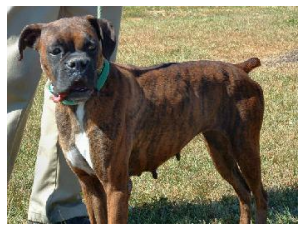

In [4]:
plt.imshow(images[0])
plt.axis('off')

In [8]:
#인공지능 모델 만들기
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet')
resnet50_pre.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [9]:
#강아지 고양이 테스트
#대상이 무엇인지를 알려줌
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [10]:
def pred_img(img):
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_resized = cv2.resize(img, (224,224)) #사이즈 조정
  pred = resnet50_pre.predict(img_resized.reshape([1, 224,224, 3])) #예측
  decoded_pred = decode_predictions(pred) #예측된 결과를 어떤 대상인지 바꿔줌

  for i, instance in enumerate(decoded_pred[0]):
    print("{}위: {} ({:.2f}%)".format(i+1, instance[1], instance[2] * 100))

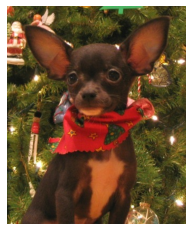

49152/35363 [=========================================] - 0s 0us/step
1위: Chihuahua (90.09%)
2위: miniature_pinscher (4.65%)
3위: French_bulldog (2.58%)
4위: Boston_bull (0.80%)
5위: boxer (0.45%)


In [11]:
pred_img(images[1])